<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/12.%2020Q%20TFIM%20VQE%26VQNHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 28.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from functools import cache
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H =  Σ Z_j Z_{j+1} - Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
interation = 1
bias = -1

operator_zz_list = ["ZZIIIIIIIIIIIIIIIIII", "IZZIIIIIIIIIIIIIIIII", "IIZZIIIIIIIIIIIIIIII", "IIIZZIIIIIIIIIIIIIII", "IIIIZZIIIIIIIIIIIIII",
                 "IIIIIZZIIIIIIIIIIIII", "IIIIIIZZIIIIIIIIIIII", "IIIIIIIZZIIIIIIIIIII", "IIIIIIIIZZIIIIIIIIII", "IIIIIIIIIZZIIIIIIIII",
                 "IIIIIIIIIIZZIIIIIIII", "IIIIIIIIIIIZZIIIIIII", "IIIIIIIIIIIIZZIIIIII", "IIIIIIIIIIIIIZZIIIII", "IIIIIIIIIIIIIIZZIIII",
                 "IIIIIIIIIIIIIIIZZIII", "IIIIIIIIIIIIIIIIZZII", "IIIIIIIIIIIIIIIIIZZI", "IIIIIIIIIIIIIIIIIIZZ",]

operator_x_list = ["XIIIIIIIIIIIIIIIIIII", "IXIIIIIIIIIIIIIIIIII", "IIXIIIIIIIIIIIIIIIII", "IIIXIIIIIIIIIIIIIIII", "IIIIXIIIIIIIIIIIIIII",
                 "IIIIIXIIIIIIIIIIIIII", "IIIIIIXIIIIIIIIIIIII", "IIIIIIIXIIIIIIIIIIII", "IIIIIIIIXIIIIIIIIIII", "IIIIIIIIIXIIIIIIIIII",
                 "IIIIIIIIIIXIIIIIIIII", "IIIIIIIIIIIXIIIIIIII", "IIIIIIIIIIIIXIIIIIII", "IIIIIIIIIIIIIXIIIIII", "IIIIIIIIIIIIIIXIIIII",
                 "IIIIIIIIIIIIIIIXIIII", "IIIIIIIIIIIIIIIIXIII", "IIIIIIIIIIIIIIIIIXII", "IIIIIIIIIIIIIIIIIIXI", "IIIIIIIIIIIIIIIIIIIX",]

for num in range(1,15):
  coeff_zz_list = [interation for _ in range(num-1)]
  coeff_x_list =  [bias for _ in range(num)]

  hamiltonian_list = []

  for i in range(num-1):
    op_z = operator_zz_list[i]
    hamiltonian_list.append((op_z[0:num], coeff_zz_list[i]))
  for i in range(num):
    op_x = operator_x_list[i]
    hamiltonian_list.append((op_x[0:num], coeff_x_list[i]))

  hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
  hamiltonian_matrix = hamiltonian.to_matrix()

  eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

  lowest_energy = np.min(eigenvalue)

  print(np.real(lowest_energy))

In [ ]:
e_list = [-0.9999999999999999,-2.2360679774997876,-3.493959207434937,-4.7587704831436275,-6.026674183332294,
          -7.296229810558757,-8.566772233505617,-9.837951447459428,-11.109565585441015,-12.381489999654768,-13.653643543587247]
n_list = [i for i in range(1,12,1)]

plt.plot(n_list,e_list)

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(19)] + [bias for _ in range(20)]
operator_list = ["ZZIIIIIIIIIIIIIIIIII", "IZZIIIIIIIIIIIIIIIII", "IIZZIIIIIIIIIIIIIIII", "IIIZZIIIIIIIIIIIIIII", "IIIIZZIIIIIIIIIIIIII",
                 "IIIIIZZIIIIIIIIIIIII", "IIIIIIZZIIIIIIIIIIII", "IIIIIIIZZIIIIIIIIIII", "IIIIIIIIZZIIIIIIIIII", "IIIIIIIIIZZIIIIIIIII",
                 "IIIIIIIIIIZZIIIIIIII", "IIIIIIIIIIIZZIIIIIII", "IIIIIIIIIIIIZZIIIIII", "IIIIIIIIIIIIIZZIIIII", "IIIIIIIIIIIIIIZZIIII",
                 "IIIIIIIIIIIIIIIZZIII", "IIIIIIIIIIIIIIIIZZII", "IIIIIIIIIIIIIIIIIZZI", "IIIIIIIIIIIIIIIIIIZZ",
                 "XIIIIIIIIIIIIIIIIIII", "IXIIIIIIIIIIIIIIIIII", "IIXIIIIIIIIIIIIIIIII", "IIIXIIIIIIIIIIIIIIII", "IIIIXIIIIIIIIIIIIIII",
                 "IIIIIXIIIIIIIIIIIIII", "IIIIIIXIIIIIIIIIIIII", "IIIIIIIXIIIIIIIIIIII", "IIIIIIIIXIIIIIIIIIII", "IIIIIIIIIXIIIIIIIIII",
                 "IIIIIIIIIIXIIIIIIIII", "IIIIIIIIIIIXIIIIIIII", "IIIIIIIIIIIIXIIIIIII", "IIIIIIIIIIIIIXIIIIII", "IIIIIIIIIIIIIIXIIIII",
                 "IIIIIIIIIIIIIIIXIIII", "IIIIIIIIIIIIIIIIXIII", "IIIIIIIIIIIIIIIIIXII", "IIIIIIIIIIIIIIIIIIXI", "IIIIIIIIIIIIIIIIIIIX",]
hamiltonian_list = []
for i in range(39):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

# VQE (depth=1) in Noiseless Simulator

scipy minimize

## Ansatz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(19)] + [bias for _ in range(20)]
operator_list = ["ZZIIIIIIIIIIIIIIIIII", "IZZIIIIIIIIIIIIIIIII", "IIZZIIIIIIIIIIIIIIII", "IIIZZIIIIIIIIIIIIIII", "IIIIZZIIIIIIIIIIIIII",
                 "IIIIIZZIIIIIIIIIIIII", "IIIIIIZZIIIIIIIIIIII", "IIIIIIIZZIIIIIIIIIII", "IIIIIIIIZZIIIIIIIIII", "IIIIIIIIIZZIIIIIIIII",
                 "IIIIIIIIIIZZIIIIIIII", "IIIIIIIIIIIZZIIIIIII", "IIIIIIIIIIIIZZIIIIII", "IIIIIIIIIIIIIZZIIIII", "IIIIIIIIIIIIIIZZIIII",
                 "IIIIIIIIIIIIIIIZZIII", "IIIIIIIIIIIIIIIIZZII", "IIIIIIIIIIIIIIIIIZZI", "IIIIIIIIIIIIIIIIIIZZ",
                 "XIIIIIIIIIIIIIIIIIII", "IXIIIIIIIIIIIIIIIIII", "IIXIIIIIIIIIIIIIIIII", "IIIXIIIIIIIIIIIIIIII", "IIIIXIIIIIIIIIIIIIII",
                 "IIIIIXIIIIIIIIIIIIII", "IIIIIIXIIIIIIIIIIIII", "IIIIIIIXIIIIIIIIIIII", "IIIIIIIIXIIIIIIIIIII", "IIIIIIIIIXIIIIIIIIII",
                 "IIIIIIIIIIXIIIIIIIII", "IIIIIIIIIIIXIIIIIIII", "IIIIIIIIIIIIXIIIIIII", "IIIIIIIIIIIIIXIIIIII", "IIIIIIIIIIIIIIXIIIII",
                 "IIIIIIIIIIIIIIIXIIII", "IIIIIIIIIIIIIIIIXIII", "IIIIIIIIIIIIIIIIIXII", "IIIIIIIIIIIIIIIIIIXI", "IIIIIIIIIIIIIIIIIIIX",]
hamiltonian_list = []
for i in range(39):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
ansatz_zz_set = []
ansatz_x_set = []

In [ ]:
def right_shifter(seq, num):
  return seq[20-num:20]+seq[0:20-num]

In [ ]:
def left_shifter(seq, num):
  new_seq = []
  for i in range(num):
    new_seq.append(seq[20-num+i])
  for i in range(20-num):
    new_seq.append(seq[i])
  new_seq = np.array(new_seq)

  return new_seq

In [ ]:
# ZZ measurement
seq_q = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
seq_c = [19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]

for i in range(19):

  qbit = QuantumRegister(20)
  cbit = ClassicalRegister(20)
  ansatz = QuantumCircuit(qbit, cbit)

  params = ParameterVector("theta", length=39)
  it = iter(params)
  ansatz.h(range(0,20))

  ansatz.barrier()

  for i in range(0,20,2):
    ansatz.cx(i,i+1)
  for i in range(0,20,2):
    ansatz.rz(next(it), i+1)
  for i in range(0,20,2):
    ansatz.cx(i,i+1)

  for i in range(1,19,2):
    ansatz.cx(i,i+1)
  for i in range(1,19,2):
    ansatz.rz(next(it), i+1)
  for i in range(1,19,2):
    ansatz.cx(i,i+1)

  ansatz.barrier()

  for i in range(20):
    ansatz.rx(next(it), i)

  ansatz.measure(seq_q,right_shifter(seq_c, i))

  ansatz_zz_set.append(ansatz)

In [ ]:
# X measurement
seq_q = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
seq_c = [19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]

for i in range(20):

  qbit = QuantumRegister(20)
  cbit = ClassicalRegister(20)
  ansatz = QuantumCircuit(qbit, cbit)

  params = ParameterVector("theta", length=39)
  it = iter(params)
  ansatz.h(range(0,20))

  ansatz.barrier()

  for i in range(0,20,2):
    ansatz.cx(i,i+1)
  for i in range(0,20,2):
    ansatz.rz(next(it), i+1)
  for i in range(0,20,2):
    ansatz.cx(i,i+1)

  for i in range(1,19,2):
    ansatz.cx(i,i+1)
  for i in range(1,19,2):
    ansatz.rz(next(it), i+1)
  for i in range(1,19,2):
    ansatz.cx(i,i+1)

  ansatz.barrier()

  for i in range(20):
    ansatz.rx(next(it), i)

  ansatz.barrier()

  ansatz.h(i)
  ansatz.measure(seq_q,right_shifter(seq_c, i))

  ansatz_x_set.append(ansatz)

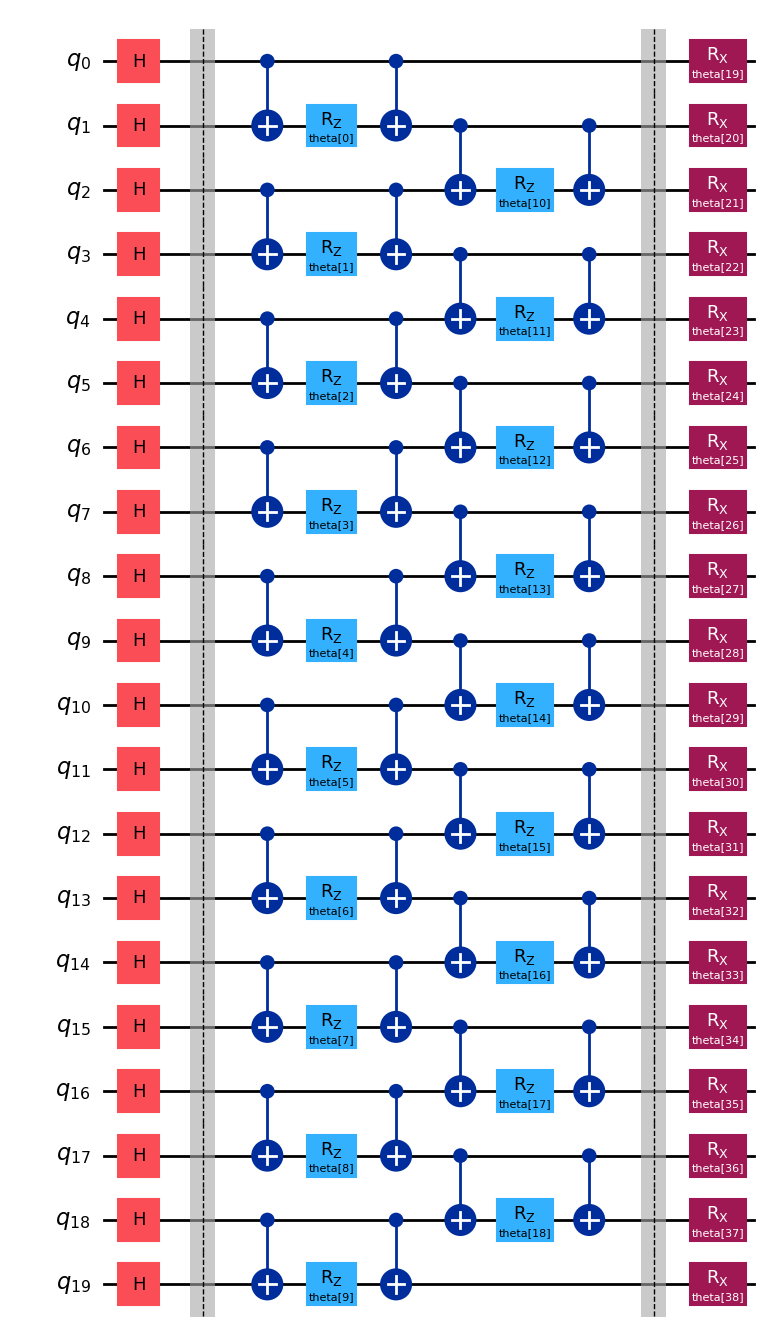

In [ ]:
# Ansatz

ansatz = QuantumCircuit(20)

params = ParameterVector("theta", length=39)
it = iter(params)
ansatz.h(range(0,20))

ansatz.barrier()

for i in range(0,20,2):
  ansatz.cx(i,i+1)
for i in range(0,20,2):
  ansatz.rz(next(it), i+1)
for i in range(0,20,2):
  ansatz.cx(i,i+1)

for i in range(1,19,2):
  ansatz.cx(i,i+1)
for i in range(1,19,2):
  ansatz.rz(next(it), i+1)
for i in range(1,19,2):
  ansatz.cx(i,i+1)

ansatz.barrier()

for i in range(20):
  ansatz.rx(next(it), i)

ansatz.draw("mpl")

In [ ]:
# Estimator & Sampler

estimator = Estimator()
sampler = Sampler()

## VQE Function

In [ ]:
def cost_func_vqe(params_pqc):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params_pqc).result()
    return cost.values[0]

In [ ]:
def build_callback_vqe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost_vqe = cost_func_vqe(current_vector)

    callback_dict["cost_history"].append(current_cost_vqe)

    print(current_cost_vqe)

  return callback

## 1st Step : VQE

In [ ]:
local_minimum_list = []

for k in range(5):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(39)

  callback = build_callback_vqe(callback_dict)

  options = dict()
  options["maxiter"] = 40
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  print(res.x)
  print()
  print()
  print()

In [ ]:
local_minimum_list

-7.520705622782408
-11.534934206750705
-15.926938082003717
-16.260555471863857
-16.890101940889878
-17.951107276777677
-18.85814949922756
-18.982968334437203
-19.113855850226987
-19.18011441179032
-19.21446030206369
-19.230509445130995
-19.234727489526236
-19.236820944575364
-19.237700933044472
-19.238399697004965
-19.238830384915037
-19.239229290994437
-19.239740751237132
-19.240340863785324
-19.240757544190156
-19.24097739371939
-19.241060594997688
-19.241119775887995
-19.24119978919616
-19.241266281930614
-19.241309948121806
-19.241360305994412
-19.24143531560577
-19.24155100415887
-19.241711546062756
-19.241865433147925
-19.242030596067234
-19.242168816297802
-19.2422314327014
-19.242257301371534
-19.242276808058453
-19.242292403107783
-19.242299194497495
-19.24230190368333

         Current function value: -19.242302
         Iterations: 40
         Function evaluations: 1720
         Gradient evaluations: 43

[ 1.29135598e+00  2.84594469e+00  3.54184550e+00  3.14165408e+00
  5.96317658e-01  4.54115505e+00  1.89157917e+00  6.53751679e+00
  5.91064011e+00  4.35104845e-01  3.91869807e+00  2.75575316e+00
  3.62140267e+00  4.54143810e+00 -5.96547111e-01  3.14304943e+00
 -8.35866353e-01  6.69924435e+00  5.88106513e+00  4.71217238e+00
  6.28293000e+00  4.71229196e+00  3.14148907e+00  4.71292073e+00
 -7.70663247e-04  4.71328110e+00 -1.57074476e+00  6.28335819e+00
  4.71237616e+00  3.14129608e+00  1.57024358e+00  4.69340442e+00
  3.11369182e+00  4.56770998e+00  5.41811490e-01  4.03780261e+00
  3.94476041e+00  3.80615096e+00  7.22928362e+00]



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
-11.110962289795417
-13.66935233873426
-16.03461746031786
-17.03953660262346
-17.578106489245368
-17.782052375928373
-18.029909333957747
-18.20621809954273
-18.340656285432797
-18.50401447045814
-18.69483830881634
-18.828887792013493
-18.96569850713991
-19.07595715224016
-19.146916902034423
-19.20345321360867
-19.23114968240136
-19.242997944724642
-19.24667091087219
-19.249313329774452
-19.25047401081991
-19.25122652533901
-19.252031758878303
-19.25302065774832
-19.253811709015356
-19.254689243484965
-19.255411360523283
-19.255651155032844
-19.255801431473074
-19.255847591313742
-19.25588036547634
-19.25589143217079
-19.255893977658506
-19.255894795814843
-19.255895185465686
-19.25589544155285
-19.255895612811692
-19.255895684454046
-19.25589573621147
-19.25589581775215

         Current function value: -19.255896
         Iterations: 40
         Function evaluations: 1720
         Gradient evaluations: 43

[ 1.42930787e+00  2.43577954e+00  1.62984024e-01  4.01387715e-01
  2.50163036e-03  2.36409851e+00  2.75432221e+00  2.74753319e+00
  3.43726913e+00  4.99219252e+00  2.60126403e+00  5.08689249e+00
  3.81001248e-01  5.80314458e+00  1.29099704e+00  2.84596736e+00
  2.74758142e+00  3.52885820e+00  2.36405725e+00  1.57075941e+00
  3.14159132e+00  4.71274819e+00  3.14323381e+00  4.71565048e+00
  6.26969217e+00  4.72547603e+00 -1.21033825e-02  1.58349268e+00
  1.57415103e+00  3.14306045e+00 -1.57030078e+00  3.14101262e+00
  4.71298335e+00  3.14103864e+00  4.71287737e+00 -3.26544387e-04
  4.71254370e+00  3.14160932e+00 -1.57080868e+00]



-1.9701876557621314
-7.489906099267909
-10.484934627505526
-15.177785675788186
-17.20622875189643
-17.611084027479883
-18.272901392884847
-18.808507142657216
-18.908932856608114
-18.963734935471603
-19.00604175920182
-19.037422053399066
-19.05886088913039
-19.093440178311067
-19.1441678465361
-19.18279098985707
-19.233013601880476
-19.274384327278852
-19.29484863235577
-19.30611399905537
-19.318336521032933
-19.33638719671649
-19.350145386500788
-19.36657816034905
-19.374932123042502
-19.38163931416448
-19.384234946611393
-19.386482870698934
-19.389062547108793
-19.3906153092195
-19.392507899215502
-19.39453730953847
-19.396409912324152
-19.39786324374973
-19.399046352082415
-19.399692024847624
-19.40015322794427
-19.40042829530194
-19.400578322035592
-19.400635655592232

         Current function value: -19.400636
         Iterations: 40
         Function evaluations: 1680
         Gradient evaluations: 42

[ 1.29131817e+00  2.84540040e+00  2.74673765e+00  3.53430673e+00
  2.75373257e+00  2.36552623e+00  8.09595371e-04  4.22878383e+00
  1.85543262e+00  2.85126527e-01  2.36456771e+00  3.52834764e+00
  3.53513707e+00  2.74863316e+00  3.43743040e+00  7.57642725e+00
  5.20601795e+00  3.14121591e+00  5.49917378e+00  1.57346742e+00
  3.14264720e+00 -1.56958773e+00  3.13883174e+00  1.56991580e+00
  3.55166857e-03  4.70654264e+00  5.48968997e-03  1.56608820e+00
  1.67393480e-03 -1.56961894e+00  3.14208810e+00  1.57008000e+00
  4.71061222e+00  3.14074233e+00  1.56928069e+00  1.56963137e+00
  6.28308658e+00  1.56970161e+00  3.14360373e+00]



-3.7429396920754012
-10.55949859666793
-13.95565052960795
-18.16260500134412
-20.264529638832315
-20.812405940210805
-21.00386752541519
-21.102252782000186
-21.238541462382884
-21.33024869426228
-21.373723664113655
-21.39537284093445
-21.402927362708805
-21.40840924029252
-21.413222828609356
-21.41751588917427
-21.42317763544046
-21.430271986450144
-21.438653075053587
-21.445879719882896
-21.453201758593252
-21.460133629366187
-21.46969214050618
-21.476910655120474
-21.47992206304154
-21.481229333445697
-21.48277734431748
-21.48476605305161
-21.48767399221471
-21.49186298731947
-21.49728416956477
-21.50455818244782
-21.514366149356487
-21.5202036163834
-21.524463867789486
-21.525929153166942
-21.52640661705485
-21.526633261668735
-21.526718733258065
-21.52681310425065

         Current function value: -21.526813
         Iterations: 40
         Function evaluations: 1760
         Gradient evaluations: 44

[ 0.46944543  5.31343952  3.37690539  3.11390313  5.50407304  6.67023214
 -0.39257294 -0.39314811 -0.39170969  0.47938853 -0.24360364  4.13318873
  2.674116    1.85484461  5.98879351  6.6757513  -0.39238204  5.89085244
  0.39833928  1.63337919  3.08050457  4.73825371  3.16162257  1.60817912
  3.02065022  4.8492742   1.60883557  0.01674795  1.57654863  6.28961769
 -1.5734664   6.28124676  1.57679644  6.2714288   1.58802706 -0.01936993
  1.59019183  3.12278185  1.58847518]



-9.468318683136058
-13.578525624890162
-16.91236208112196
-19.85496286050985
-20.69535293758992
-22.10703052394396
-23.30630647995389
-23.402389566706763
-23.567366170808505
-23.785083725684693
-23.853270038546878
-23.906287737277605
-23.9229203656508
-23.93937805899259
-23.94126136985025
-23.94454230500476
-23.94956515797848
-23.953765510091756
-23.95627686691011
-23.959329034037776
-23.96363117568546
-23.967315822682693
-23.970862908121084
-23.97389716505663
-23.975987545884035
-23.977428871869922
-23.97861496993869
-23.97931360235172
-23.97966127559692
-23.980027806126017
-23.98037378448192
-23.9805964178033
-23.980853891126216
-23.981284057095095
-23.98194053476444
-23.98257538430808
-23.982976377153964
-23.983368727178018
-23.983732903747207
-23.984293737957987

         Current function value: -23.984294
         Iterations: 40
         Function evaluations: 1680
         Gradient evaluations: 42
         
[ 5.80954109  5.89308672  5.89809641  5.89203791  5.8947949   0.38811303
  5.90392926 -0.38032311  0.37800431  0.46588376  6.68179276  0.39622559
  5.88831156  6.68068474 -0.39718786  5.88340218  0.40438751  0.40334706
  0.40220222  4.49488173  3.36601597  7.59449903  6.59201757  4.35679996
  3.53892052 -1.99526077  3.59804902  1.07532321  6.8278001   0.97781201
  3.77568764  4.03362966  3.89365511  0.73134603  0.93346023  3.69473636
  1.12013818  3.48915903  1.27079613]

[-19.24230190368333,
 -19.25589581775215,
 -19.400635655592232,
 -21.52681310425065,
 -23.984293737957987]

In [ ]:
local_minimum_list = []

for k in range(5,10,1):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(39)

  callback = build_callback_vqe(callback_dict)

  options = dict()
  options["maxiter"] = 40
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  print(res.x)
  print()
  print()
  print()

-9.223668685798977
-13.20088712498172
-15.668892033013915
-18.122389362789782
-18.52090940494462
-18.858061810068232
-18.937049681234935
-18.986645960240594
-19.014928012425464
-19.051525396209467
-19.11262326233787
-19.145057507528097
-19.18830988907906
-19.217635323230258
-19.23551818847399
-19.253763119901315
-19.273203519658036
-19.283086464720125
-19.29020246340326
-19.292799679620344
-19.293837316943247
-19.294223263101397
-19.294473474678302
-19.294570524523383
-19.294646127647095
-19.294701923160467
-19.29474385848116
-19.294797855893208
-19.294862080754836
-19.294886285720793
-19.294892973378488
-19.29489626865919
-19.294899998587884
-19.294906125244164
-19.294916922449573
-19.29493679558625
-19.295090706860037
-19.295175938098872
-19.29530728553779
-19.295540863561577
         Current function value: -19.295541
         Iterations: 40
         Function evaluations: 1800
         Gradient evaluations: 45
[-4.70724844e-01  5.51890626e+00  3.13838113e+00  5.51574516e+00
  4.7226

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


-7.959102080516935
-13.249878338148024
-14.244862663787755
-15.925455332341802
-17.399380144775638
-17.957651408025814
-18.475149771448486
-18.842739912314546
-18.927462688112655
-18.98173537283415
-19.015463187420497
-19.040780708370615
-19.061002533334186
-19.068521398224206
-19.074075500068414
-19.08001537416257
-19.0868077936225
-19.089648723736016
-19.091397351625886
-19.092327226312
-19.093267242299866
-19.09441414494485
-19.095447831141783
-19.09632016458306
-19.097008723813996
-19.097934368477336
-19.09894383861641
-19.10009838187194
-19.101172426014
-19.102085167348942
-19.103021605688173
-19.10366996356275
-19.10394342548629
-19.10398597352122
-19.104009711591345
-19.104020626629
-19.104026029460577
-19.10402917876597
-19.104030271692235
-19.10403074526398
         Current function value: -19.104031
         Iterations: 40
         Function evaluations: 1720
         Gradient evaluations: 43
[ 7.57662846e+00  2.84052337e+00  3.14193105e+00  5.96198662e-01
  1.74170282e+00  2.

In [ ]:
local_minimum_list

[-19.295540863561577,
 -19.10403074526398,
 -16.330083757553755,
 -19.197484815068787,
 -19.197461940738087]

-9.223668685798977
-13.20088712498172
-15.668892033013915
-18.122389362789782
-18.52090940494462
-18.858061810068232
-18.937049681234935
-18.986645960240594
-19.014928012425464
-19.051525396209467
-19.11262326233787
-19.145057507528097
-19.18830988907906
-19.217635323230258
-19.23551818847399
-19.253763119901315
-19.273203519658036
-19.283086464720125
-19.29020246340326
-19.292799679620344
-19.293837316943247
-19.294223263101397
-19.294473474678302
-19.294570524523383
-19.294646127647095
-19.294701923160467
-19.29474385848116
-19.294797855893208
-19.294862080754836
-19.294886285720793
-19.294892973378488
-19.29489626865919
-19.294899998587884
-19.294906125244164
-19.294916922449573
-19.29493679558625
-19.295090706860037
-19.295175938098872
-19.29530728553779
-19.295540863561577

         Current function value: -19.295541
         Iterations: 40
         Function evaluations: 1800
         Gradient evaluations: 45

[-4.70724844e-01  5.51890626e+00  3.13838113e+00  5.51574516e+00
  4.72260948e-01  4.97904893e+00  3.43226086e+00  3.51791621e+00
  2.95365404e+00  1.18485363e+00  3.03802899e-01  4.44533148e+00
  1.83929605e+00 -3.02967459e-01  6.26133832e+00  2.37351523e+00
  2.74170013e+00  2.69891790e+00  2.20968097e+00  4.81728622e+00
  3.05419055e+00  1.59793741e+00  5.94809968e-03 -1.56248063e+00
  1.57811931e+00  8.83115340e-03  1.58757592e+00  6.24765532e+00
  4.75434555e+00  1.62444111e+00  3.66323454e-02  1.67603438e+00
  2.81421669e+00  5.14833934e+00 -5.51334561e-01  2.26030265e+00
 -1.39523365e+00  3.18092525e+00  1.59447676e+00]



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
-7.959102080516935
-13.249878338148024
-14.244862663787755
-15.925455332341802
-17.399380144775638
-17.957651408025814
-18.475149771448486
-18.842739912314546
-18.927462688112655
-18.98173537283415
-19.015463187420497
-19.040780708370615
-19.061002533334186
-19.068521398224206
-19.074075500068414
-19.08001537416257
-19.0868077936225
-19.089648723736016
-19.091397351625886
-19.092327226312
-19.093267242299866
-19.09441414494485
-19.095447831141783
-19.09632016458306
-19.097008723813996
-19.097934368477336
-19.09894383861641
-19.10009838187194
-19.101172426014
-19.102085167348942
-19.103021605688173
-19.10366996356275
-19.10394342548629
-19.10398597352122
-19.104009711591345
-19.104020626629
-19.104026029460577
-19.10402917876597
-19.104030271692235
-19.10403074526398

         Current function value: -19.104031
         Iterations: 40
         Function evaluations: 1720
         Gradient evaluations: 43

[ 7.57662846e+00  2.84052337e+00  3.14193105e+00  5.96198662e-01
  1.74170282e+00  2.66171094e+00  3.53295318e+00  3.52648531e+00
  4.11415461e+00  6.05818927e+00  3.91524587e+00  3.61439696e+00
  1.74158262e+00  5.68669548e+00  3.14162695e+00  3.54051388e+00
  2.74710397e+00  2.90306677e+00  5.28958594e+00  4.71232390e+00
  4.01059554e-05  4.71196189e+00  3.14274431e+00  7.85252886e+00
  4.71184363e+00  3.14123718e+00  1.57080019e+00  6.28322686e+00
  1.57088331e+00  1.57090103e+00  6.28306646e+00  4.71274596e+00
 -3.33528924e-04  1.57102109e+00  3.14149585e+00  4.71235338e+00
  6.28334690e+00  1.57128609e+00 -1.74596362e-03]



0.14416071331200364
-6.034003994334872
-9.193152867202242
-11.8051555798801
-14.178815371438585
-15.062886536317137
-15.537218484170555
-15.715762988346262
-15.876855967971837
-15.947885172395793
-16.002594671724435
-16.078648710824815
-16.140416633126733
-16.221156813749253
-16.292240724979994
-16.305782400003075
-16.314546705880478
-16.318699719958875
-16.3222405270438
-16.324522297212663
-16.326032638880466
-16.32661714876838
-16.326912978615216
-16.327102250646067
-16.327208372520712
-16.3272907755092
-16.327362681074685
-16.327455454714375
-16.32755567293321
-16.327721688776165
-16.328002550783733
-16.328455244129696
-16.329011845861366
-16.3294572451496
-16.32975227725036
-16.329877442574144
-16.32993902193662
-16.329981479403795
-16.3300242785981
-16.330083757553755

         Current function value: -16.330084
         Iterations: 40
         Function evaluations: 1680
         Gradient evaluations: 42

[-0.38176994  5.98896878  1.85350315  4.56972157  5.58554451  3.29510841
  1.76945284  0.88643937  2.66786573  0.09366356  5.89289645  7.06416144
  3.14188979 -0.54424887  1.93034698  3.23618649  0.47995081  2.24639422
  7.66111018  0.14098452  1.44122428  6.38507529  1.53732047  3.13621582
  4.70911912  1.5701838   3.14064429  4.70647109  3.11823699  4.66515942
  0.19521821  4.65411804  3.09828174  1.56244683  3.13807756  4.71425784
  3.19202748  1.64306533  2.8468558 ]



-3.2865743899788296
-6.99003808662132
-12.60124972086021
-13.757978780898823
-15.770928171631782
-18.15397062673069
-18.415078689501005
-18.53261436574851
-18.69924989495171
-18.864846576688567
-18.978962301454967
-19.09193887468202
-19.142996409982324
-19.15597400374597
-19.158389990495735
-19.162296845264503
-19.16644290446282
-19.16813684029969
-19.170816712149968
-19.175189437114103
-19.18088669901082
-19.18473139115439
-19.18972880154699
-19.194187300838085
-19.19549041714734
-19.1964632810647
-19.19693969081985
-19.19713918479663
-19.197206662781454
-19.19726261695362
-19.19732265896302
-19.19736571506383
-19.197399247659767
-19.197432296109678
-19.197457498604237
-19.197475643226284
-19.197481956966204
-19.197484038917473
-19.19748457625275
-19.197484815068787

         Current function value: -19.197485
         Iterations: 40
         Function evaluations: 1720
         Gradient evaluations: 43

[ 5.80313475e+00  5.89983151e+00  7.26056850e+00  3.37256198e+00
  2.35892298e+00  8.71061140e-07  3.92431309e+00  3.37120607e+00
  9.71454666e-01 -4.69575439e-01  5.88236213e+00  6.04621776e+00
  4.12858778e+00  2.85294564e+00  4.99542623e+00  1.28755752e+00
  2.85297930e+00  8.43349528e+00  6.04085165e+00  1.57030524e+00
  3.77376108e-04  7.85384452e+00  4.28117365e-05  1.57074562e+00
  3.14153036e+00  1.57071631e+00  3.14173687e+00  4.71231206e+00
  3.14155010e+00  4.71234923e+00  1.57062451e+00  3.14141806e+00
  1.57065217e+00  6.28340796e+00  4.71226355e+00  3.14155355e+00
  1.57084673e+00 -5.09420794e-05  1.57089371e+00]



-2.6489731163312764
-8.57006524362938
-10.683108436775614
-13.880325443731104
-15.06354691134706
-17.03221286701042
-18.114220607855298
-18.40592661739664
-18.540233974317687
-18.75656178632707
-18.857481434974385
-18.962254840032525
-19.040947630295232
-19.08667965341427
-19.117537804605213
-19.144058121254684
-19.162836753391687
-19.17930306940852
-19.18441860639339
-19.189377549081225
-19.190372088208377
-19.19147655833694
-19.19227831261888
-19.193084565836745
-19.193878286348067
-19.19464491298295
-19.195450239352255
-19.19613127813076
-19.196663128612347
-19.19709656965244
-19.19731163605766
-19.197412961242875
-19.197442734827764
-19.197451445851456
-19.197454037215525
-19.197455221681828
-19.197456632801476
-19.197458363672137
-19.197460421524287
-19.197461940738087

         Current function value: -19.197462
         Iterations: 40
         Function evaluations: 1760
         Gradient evaluations: 44
         
[-1.28701528e+00  3.43016029e+00  4.12547606e+00  2.32525029e-01
 -7.83688931e-01  3.14380025e+00  3.38247125e+00 -9.85162351e-01
  3.83276020e-01  4.80026384e-01  2.35848741e+00  3.37335832e+00
  7.26532532e+00 -2.88323548e-01  4.42817634e+00  3.61094960e+00
  4.11777591e+00  6.04863804e+00  5.88233433e+00  4.71260910e+00
  3.14171181e+00  4.71343958e+00  6.28074469e+00  4.71335374e+00
  6.28337962e+00  4.71230738e+00  6.28410354e+00  1.57078000e+00
  1.31180627e-03  4.71561469e+00  4.72297357e+00  6.27379211e+00
  4.71510297e+00  6.70292730e-04  1.57065771e+00  6.28393628e+00
  4.71172189e+00  3.14250495e+00  1.57002474e+00]


[-19.295540863561577,
 -19.10403074526398,
 -16.330083757553755,
 -19.197484815068787,
 -19.197461940738087]

In [ ]:
local_minimum_list = []

for k in range(10,15,1):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(39)

  callback = build_callback_vqe(callback_dict)

  options = dict()
  options["maxiter"] = 40
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  print(res.x)
  print()
  print()
  print()

-4.717033614274973
-9.920609547343155
-13.10689229484797
-14.671766029142866
-17.279801109986384
-18.327532820277785
-19.827826013829345
-20.362065019290572
-20.869955095954346
-21.1112727224218
-21.264474350694183
-21.359211201861754
-21.39821778956525
-21.423588708952416
-21.44042908411329
-21.45305388147509
-21.462463301102737
-21.464397844361905
-21.466171976524603
-21.466824738016083
-21.46765207803965
-21.468726741450666
-21.470078244972715
-21.472132905898466
-21.475194762075393
-21.4789311632329
-21.483275843653047
-21.488626522789236
-21.491608794424586
-21.49284667365483
-21.49348857880987
-21.49384851982677
-21.494033231368753
-21.494115431623783
-21.49416315656118
-21.494199512646347
-21.494236824520172
-21.494287701963046
-21.49433919285365
-21.494427481162187
         Current function value: -21.494427
         Iterations: 40
         Function evaluations: 1680
         Gradient evaluations: 42
[ 5.80287669 -0.39696754  6.28058525  3.91699891  3.52905763  2.66459386
  1.9

In [ ]:
local_minimum_list

[-21.494427481162187,
 -21.607344893241006,
 -21.45135603288417,
 -21.497005894417633,
 -21.63362732500525]

In [ ]:
local_minimum_list = []

for k in range(15,20,1):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(39)

  callback = build_callback_vqe(callback_dict)

  options = dict()
  options["maxiter"] = 40
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  print(res.x)
  print()
  print()
  print()

-4.835874071365443
-12.216671325499759
-16.183616845857145
-18.073973557002898
-19.334196300636155
-20.407347924340286
-20.61560140890123
-20.70088796939357
-20.80608642264321
-20.944203689054177
-21.033516031733015
-21.116395761145924
-21.14734172714413
-21.170234159630454
-21.208146851721985
-21.25416900474062
-21.303353503888733
-21.369302521849665
-21.408894768401144
-21.436608503604965
-21.448090612316946
-21.456356956785328
-21.462226413399488
-21.468045813720238
-21.474670283731804
-21.477614406768655
-21.47892960472955
-21.479369521972963
-21.47978372799092
-21.4801061512212
-21.480580214712038
-21.48124926721693
-21.482180729156376
-21.48351798179698
-21.485143851064418
-21.486426404020047
-21.487093599801433
-21.4874863786044
-21.487848426946794
-21.488315236809527
         Current function value: -21.488315
         Iterations: 40
         Function evaluations: 1680
         Gradient evaluations: 42
[ 5.80385514  0.39429371 -0.04740135  2.35556649  3.52965808  2.74871268
  2

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


-7.220274757149297
-13.308267561108794
-16.073903894965383
-17.6963446754273
-18.554832506050545
-18.780687835027848
-18.918871921623857
-18.99342208862956
-19.09881385162645
-19.148065542933814
-19.165725369168133
-19.180885790005078
-19.202264743051977
-19.22915894839483
-19.25658913713305
-19.276321150600108
-19.285145832492606
-19.28854195030068
-19.290738927042078
-19.291625241965445
-19.292151580813723
-19.29266574205617
-19.293188793219723
-19.29369309903971
-19.294163876626904
-19.294462863087315
-19.294590328893072
-19.29464053367833
-19.294680719007655
-19.294730954278688
-19.29475551408549
-19.29476893082772
-19.29477423480242
-19.294775666771326
-19.294776092809258
-19.294776598853364
-19.294777507631565
-19.2947791907598
-19.294782361418857
-19.294808727898026
         Current function value: -19.294809
         Iterations: 40
         Function evaluations: 1800
         Gradient evaluations: 45
[ 1.11014314e+00  3.04372512e+00  3.42827249e+00  1.27990530e+00
  1.29181309e

In [ ]:
local_minimum_list

[-21.488315236809527,
 -19.294808727898026,
 -21.669632067280162,
 -19.399640191132526,
 -19.333146077382555]

# VQNHE (depth=2) in Noiseless Simulator

scipy minimize

## Ansatz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(19)] + [bias for _ in range(20)]
operator_list = ["ZZIIIIIIIIIIIIIIIIII", "IZZIIIIIIIIIIIIIIIII", "IIZZIIIIIIIIIIIIIIII", "IIIZZIIIIIIIIIIIIIII", "IIIIZZIIIIIIIIIIIIII",
                 "IIIIIZZIIIIIIIIIIIII", "IIIIIIZZIIIIIIIIIIII", "IIIIIIIZZIIIIIIIIIII", "IIIIIIIIZZIIIIIIIIII", "IIIIIIIIIZZIIIIIIIII",
                 "IIIIIIIIIIZZIIIIIIII", "IIIIIIIIIIIZZIIIIIII", "IIIIIIIIIIIIZZIIIIII", "IIIIIIIIIIIIIZZIIIII", "IIIIIIIIIIIIIIZZIIII",
                 "IIIIIIIIIIIIIIIZZIII", "IIIIIIIIIIIIIIIIZZII", "IIIIIIIIIIIIIIIIIZZI", "IIIIIIIIIIIIIIIIIIZZ",
                 "XIIIIIIIIIIIIIIIIIII", "IXIIIIIIIIIIIIIIIIII", "IIXIIIIIIIIIIIIIIIII", "IIIXIIIIIIIIIIIIIIII", "IIIIXIIIIIIIIIIIIIII",
                 "IIIIIXIIIIIIIIIIIIII", "IIIIIIXIIIIIIIIIIIII", "IIIIIIIXIIIIIIIIIIII", "IIIIIIIIXIIIIIIIIIII", "IIIIIIIIIXIIIIIIIIII",
                 "IIIIIIIIIIXIIIIIIIII", "IIIIIIIIIIIXIIIIIIII", "IIIIIIIIIIIIXIIIIIII", "IIIIIIIIIIIIIXIIIIII", "IIIIIIIIIIIIIIXIIIII",
                 "IIIIIIIIIIIIIIIXIIII", "IIIIIIIIIIIIIIIIXIII", "IIIIIIIIIIIIIIIIIXII", "IIIIIIIIIIIIIIIIIIXI", "IIIIIIIIIIIIIIIIIIIX",]
hamiltonian_list = []
for i in range(39):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
ansatz_zz_set = []
ansatz_x_set = []

In [ ]:
def right_shifter(seq, num):
  return seq[20-num:20]+seq[0:20-num]

In [ ]:
def left_shifter(seq, num):
  new_seq = []
  for i in range(num):
    new_seq.append(seq[20-num+i])
  for i in range(20-num):
    new_seq.append(seq[i])
  new_seq = np.array(new_seq)

  return new_seq

In [ ]:
# ZZ measurement
seq_q = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
seq_c = [19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]

for i in range(19):

  qbit = QuantumRegister(20)
  cbit = ClassicalRegister(20)
  ansatz = QuantumCircuit(qbit, cbit)

  params = ParameterVector("theta", length=78)
  it = iter(params)

  ansatz.h(range(0,20))

  ansatz.barrier()

  for i in range(0,20,2):
    ansatz.cx(i,i+1)
  for i in range(0,20,2):
    ansatz.rz(next(it), i+1)
  for i in range(0,20,2):
    ansatz.cx(i,i+1)

  for i in range(1,19,2):
    ansatz.cx(i,i+1)
  for i in range(1,19,2):
    ansatz.rz(next(it), i+1)
  for i in range(1,19,2):
    ansatz.cx(i,i+1)

  ansatz.barrier()

  for i in range(20):
    ansatz.rx(next(it), i)


  ansatz.barrier()

  for i in range(0,20,2):
    ansatz.cx(i,i+1)
  for i in range(0,20,2):
    ansatz.rz(next(it), i+1)
  for i in range(0,20,2):
    ansatz.cx(i,i+1)

  for i in range(1,19,2):
    ansatz.cx(i,i+1)
  for i in range(1,19,2):
    ansatz.rz(next(it), i+1)
  for i in range(1,19,2):
    ansatz.cx(i,i+1)

  ansatz.barrier()

  for i in range(20):
    ansatz.rx(next(it), i)

  ansatz.measure(seq_q,right_shifter(seq_c, i))

  ansatz_zz_set.append(ansatz)

In [ ]:
# X measurement
seq_q = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
seq_c = [19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]

for i in range(20):
  ansatz_prime = ansatz
  ansatz_prime.h(i)
  ansatz_prime.measure(seq_q,right_shifter(seq_c, i))

  ansatz_x_set.append(ansatz_prime)

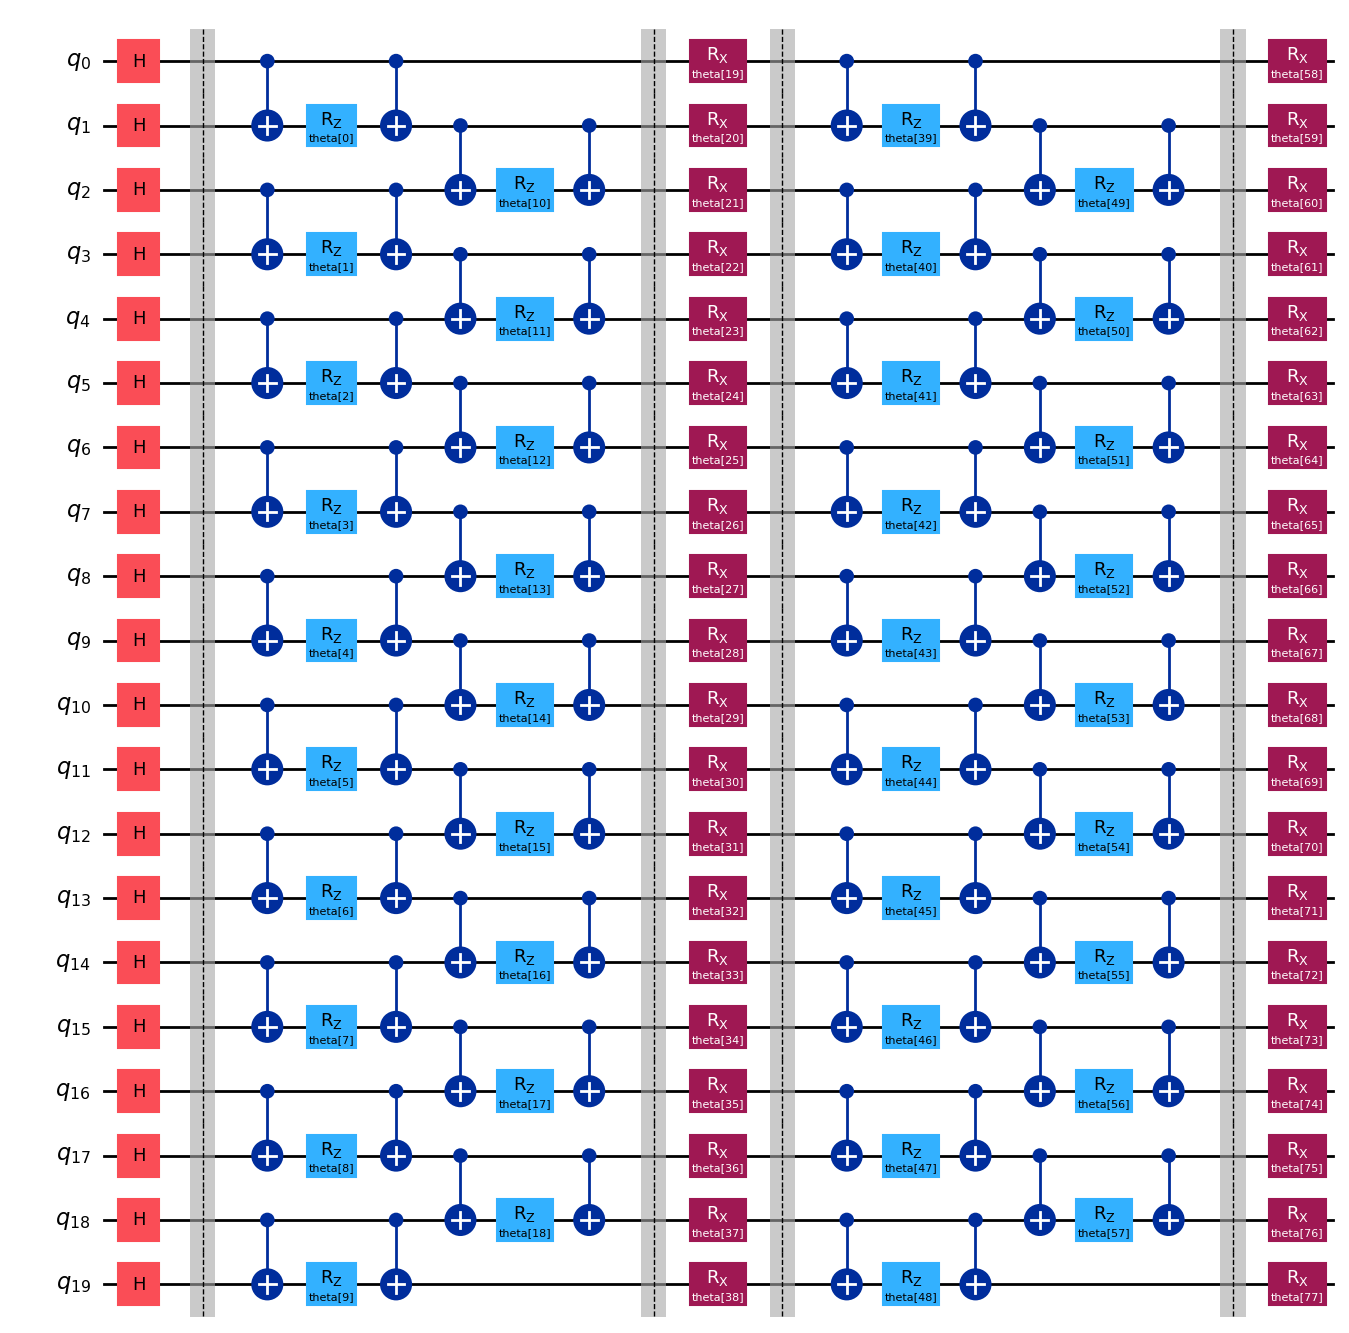

In [ ]:
# Ansatz

ansatz = QuantumCircuit(20)

params = ParameterVector("theta", length=78)
it = iter(params)
ansatz.h(range(0,20))

ansatz.barrier()

for i in range(0,20,2):
  ansatz.cx(i,i+1)
for i in range(0,20,2):
  ansatz.rz(next(it), i+1)
for i in range(0,20,2):
  ansatz.cx(i,i+1)

for i in range(1,19,2):
  ansatz.cx(i,i+1)
for i in range(1,19,2):
  ansatz.rz(next(it), i+1)
for i in range(1,19,2):
  ansatz.cx(i,i+1)

ansatz.barrier()

for i in range(20):
  ansatz.rx(next(it), i)


ansatz.barrier()

for i in range(0,20,2):
  ansatz.cx(i,i+1)
for i in range(0,20,2):
  ansatz.rz(next(it), i+1)
for i in range(0,20,2):
  ansatz.cx(i,i+1)

for i in range(1,19,2):
  ansatz.cx(i,i+1)
for i in range(1,19,2):
  ansatz.rz(next(it), i+1)
for i in range(1,19,2):
  ansatz.cx(i,i+1)

ansatz.barrier()

for i in range(20):
  ansatz.rx(next(it), i)

ansatz.draw("mpl")

In [ ]:
# Estimator & Sampler

estimator = Estimator()
sampler = Sampler()

## VQE Function

In [ ]:
def cost_func_vqe(params_pqc):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params_pqc).result()
    return cost.values[0]

In [ ]:
def build_callback_vqe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost_vqe = cost_func_vqe(current_vector)

    callback_dict["cost_history"].append(current_cost_vqe)

    print(current_cost_vqe)

  return callback

## 1st Step : VQE

In [ ]:
local_minimum_list = []

for k in range(20):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(78)

  callback = build_callback_vqe(callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  print(res.x)
  print()
  print()
  print()

-7.520705323850237
-11.53493418660927
-15.92693751140486
-16.26055606889794
-16.8901045017294
-17.951111887905498
-18.858145091727792
-18.982969862101886
-19.113855978893195
-19.180114899819607
-19.21446028010052
-19.230509479778053
-19.234727404623865
-19.2368209034219
-19.23770093414145
-19.238399689178117
-19.238830388495053
-19.2392292760753
-19.2397407835938
-19.240340723073405
-19.240757486749835
-19.24097739725853
-19.241060581137965
-19.24111975904884
-19.24119987524806
-19.24126626199791
-19.24130988775322
-19.24136017581126
-19.241435270982784
-19.241551202741853
-19.241711883905506
-19.241865123153474
-19.242030764910734
-19.242169040599727
-19.242231447566358
-19.24225731823796
-19.242276843892576


KeyboardInterrupt: 

In [ ]:
local_minimum_list

## VQNHE Function

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:400]
  W2 = parameter[400:420]
  c = parameter[420]

  W1 = W1.reshape(20,20)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(20):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
@cache
def prob_zz_str(params_pqc, num):
  job = sampler.run(ansatz_zz_set[num], params_pqc).result()
  prob_string = job.quasi_dists[0]

  for i in range(2**20):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

@cache
def prob_x_str(params_pqc, num):
  job = sampler.run(ansatz_x_set[num], params_pqc).result()
  prob_string = job.quasi_dists[0]

  for i in range(2**20):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def ZZ_vqnhe(params_nn, params_pqc, num):
  prob_string = prob_zz_str(params_pqc, num)
  nnval = np.array([(neural_net(params_nn, left_shifter(d2b(j),num)))**2 for j in range(2**20)])

  expval = 0

  for k in range(2**20):
    if k // 2**18 == 0 or k // 2**18 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X_vqnhe(params_nn, params_pqc, num):
  prob_string = prob_x_str(params_pqc, num)
  nnval = np.array([neural_net(params_nn, left_shifter(d2b(j),num)) for j in range(2**20)])

  expval = 0

  for k in range(2**19):
    delt = prob_string[k] - prob_string[k+2**19]
    expval = expval + delt*nnval[k]*nnval[k+2**19]

  return expval

In [ ]:
def norm_vqnhe(params_nn, params_pqc):
  prob_string = prob_zz_str(params_pqc, 0)
  nnval = np.array([(neural_net(params_nn, left_shifter(d2b(j),0)))**2 for j in range(2**20)])

  expval = 0

  for k in range(2**20):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, params_pqc):
  expval = 0

  for i in range(19):
    expval = expval + ZZ_vqnhe(params_nn, params_pqc, i)

  for i in range(20):
    expval = expval - X_vqnhe(params_nn, params_pqc, i)


  expval = expval / norm_vqnhe(params_nn, params_pqc)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict, params_pqc):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost_vqnhe = cost_func_vqnhe(current_vector, params_pqc)

    callback_dict["cost_history"].append(current_cost_vqnhe)

    print(current_cost_vqnhe)

  return callback

## 2nd Step : VQNHE

In [ ]:
local_minimum_list = []

for k in range(50):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  #params_pqc = ????

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(23)

  callback = build_callback_vqnhe(callback_dict, params_pqc)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(params_pqc),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

Optimization terminated successfully.
         Current function value: -9.760508
         Iterations: 28
         Function evaluations: 720
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: -9.685603
         Iterations: 27
         Function evaluations: 672
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: -12.014575
         Iterations: 37
         Function evaluations: 984
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -14.321977
         Iterations: 47
         Function evaluations: 1272
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: -11.942713
         Iterations: 38
         Function evaluations: 960
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: -11.942713
         Iterations: 42
         Function ev

In [ ]:
local_minimum_list

In [ ]:
np.min(local_minimum_list)